------------------------------------------------ CARREGANDO OS DADOS ------------------------------------------------

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lendo o dataset
file_path = 'Info de Pedidos1508.csv'
dataset = pd.read_csv(file_path, encoding='cp1252', sep=';', decimal=',')


# Exibindo as primeiras linhas para entender a estrutura dos dados
dataset.head()

,Unnamed: 0,,Pedido Id,Id Entrega,Data/Hora,Data Marketplace,Data Aprovação,Id Cliente,Situação,Situação - Transporte,...,Valor Produto,Valor Desconto,Valor Frete,Valor Frete Transportadora,Valor Total,Valor Total Pedido,Motivo Cancelamento,Origem - Source,Origem - Referência (site),Origem - Dispositivo
0,0,aguardando-pagamento,669,668,15/08/2024 11:42,15/08/2024 11:31,NaN,790,1 - Aguardando Pagamento,Não Enviado,...,129.8,31.0,28.30,25.00,98.80,98.80,NaN,NaN,NaN,NaN
1,1,aguardando-pagamento,668,667,15/08/2024 10:42,15/08/2024 10:41,NaN,789,1 - Aguardando Pagamento,Não Enviado,...,71.9,17.0,5.48,25.00,54.90,54.90,NaN,NaN,NaN,NaN
2,2,transporte,667,666,15/08/2024 07:33,NaN,15/08/2024 07:34,788,7 - Transporte,Não Enviado,...,19.7,0.0,10.51,10.51,30.21,30.21,NaN,adwords,https-www-google-com,Mobile
3,3,transporte,666,665,15/08/2024 00:14,NaN,15/08/2024 00:15,787,7 - Transporte,Não Enviado,...,56.7,0.0,17.30,17.30,74.00,74.00,NaN,adwords,https-www-google-com-br,Mobile
4,4,aguardando-pagamento,665,664,14/08/2024 23:02,14/08/2024 22:42,NaN,786,1 - Aguardando Pagamento,Não Enviado,...,46.9,2.0,5.48,25.00,44.90,44.90,NaN,NaN,NaN,NaN


In [ ]:
display(dataset['Situação'].value_counts())

# 8 - Entregue
# 7 - Transporte
# 1 - Aguardando pagamento
# 2 - Cancelado
# 26 - Nota Fiscal Cancelada

------------------------------------------------ TRATANDO OS DADOS ------------------------------------------------

In [4]:
dataset = dataset[dataset['Situação'] != '1 - Aguardando Pagamento']
dataset = dataset[dataset['Situação'] != '26 - Nota Fiscal Cancelada']

dataset['Valor Pedido'] = dataset['Valor Produto'] - dataset['Valor Desconto']
dataset = dataset.drop(['Valor Desconto'], axis=1)
dataset = dataset.drop(['Valor Produto'], axis=1)

dataset['Valor Total'] = dataset['Valor Pedido'] + dataset['Valor Frete']

dataset['Percentual Frete'] = dataset['Valor Frete'] / dataset['Valor Total'] * 100
dataset['Percentual Frete'] = dataset['Percentual Frete'].round(1)

dataset['Situação'] = dataset['Situação'].replace(to_replace = '2 - Cancelado Pagamento', value = 'Cancelada')
dataset['Situação'] = dataset['Situação'].replace(to_replace = '8 - Entregue', value = 'Concluida')
dataset['Situação'] = dataset['Situação'].replace(to_replace = '7 - Transporte', value = 'Concluida')

display(dataset['Situação'].value_counts())
display(dataset)

Situação
Concluida    473
Cancelada    173
Name: count, dtype: int64

,Unnamed: 0,,Pedido Id,Id Entrega,Data/Hora,Data Marketplace,Data Aprovação,Id Cliente,Situação,Situação - Transporte,...,Valor Frete,Valor Frete Transportadora,Valor Total,Valor Total Pedido,Motivo Cancelamento,Origem - Source,Origem - Referência (site),Origem - Dispositivo,Valor Pedido,Percentual Frete
2,2,transporte,667,666,15/08/2024 07:33,NaN,15/08/2024 07:34,788,Concluida,Não Enviado,...,10.51,10.51,30.21,30.21,NaN,adwords,https-www-google-com,Mobile,19.70,34.8
3,3,transporte,666,665,15/08/2024 00:14,NaN,15/08/2024 00:15,787,Concluida,Não Enviado,...,17.30,17.30,74.00,74.00,NaN,adwords,https-www-google-com-br,Mobile,56.70,23.4
7,7,transporte,662,661,14/08/2024 18:02,14/08/2024 17:47,15/08/2024 04:41,784,Concluida,Não Enviado,...,0.00,25.00,24.90,24.90,NaN,NaN,NaN,NaN,24.90,0.0
8,8,transporte,661,660,14/08/2024 18:02,14/08/2024 17:56,14/08/2024 18:02,783,Concluida,Não Enviado,...,2.99,25.00,23.79,20.80,NaN,NaN,NaN,NaN,20.80,12.6
9,9,transporte,660,659,14/08/2024 16:14,14/08/2024 16:02,14/08/2024 16:36,782,Concluida,Não Enviado,...,16.07,0.00,69.87,69.87,NaN,NaN,NaN,NaN,53.80,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,648,pagamento-cancelado,16,16,05/05/2024 23:51,NaN,NaN,123,Cancelada,Não Enviado,...,10.11,10.11,49.17,49.17,NaN,ig,http-instagram-com,Mobile,39.06,20.6
649,649,pagamento-cancelado,15,15,03/05/2024 12:03,NaN,NaN,122,Cancelada,Não Enviado,...,8.97,8.97,54.63,54.63,NaN,ig,https-l-instagram-com,Mobile,45.66,16.4
650,650,entregue,14,14,03/05/2024 11:21,NaN,03/05/2024 11:33,120,Concluida,Entregue,...,9.06,9.06,41.34,41.34,NaN,NaN,NaN,Desktop,32.28,21.9
651,651,entregue,13,13,02/05/2024 22:54,NaN,02/05/2024 22:55,119,Concluida,Entregue,...,10.68,10.68,100.48,100.48,NaN,ig,http-instagram-com,Mobile,89.80,10.6


In [ ]:
# Removendo linhas duplicadas
dataset = dataset.drop_duplicates()

In [26]:
# Convertendo colunas de data
dataset['Data'] = pd.to_datetime(dataset['Data/Hora'], format='%d/%m/%Y %H:%M')

In [ ]:
# Calculando o ticket médio
ticket_medio = dataset['Valor Total'].mean()

# Exibindo o resultado
print(f'Ticket Médio dos Pedidos: R$ {ticket_medio:.2f}')

In [6]:
# Verificando se as colunas estão no formato numérico
dataset['Valor Frete'] = dataset['Valor Frete'].astype(float)
dataset['Valor Total'] = dataset['Valor Total'].astype(float)

In [27]:
# Calculando a proporção do frete em relação ao valor total
dataset['Proporção Frete'] = dataset['Valor Frete'] / dataset['Valor Total']
# Transformando a proporção em porcentagem
dataset['Proporção Frete (%)'] = dataset['Proporção Frete'] * 100
dataset['Proporção Frete (%)'] = dataset['Proporção Frete (%)'].round(2)

In [28]:
# Preenchendo valores nulos com a média
dataset.fillna({'Valor Frete': dataset['Valor Frete'].mean()}, inplace=True)

In [29]:
dataset['Valor Frete'].isna()

Data
2024-08-15 07:33:00    False
2024-08-15 00:14:00    False
2024-08-14 18:02:00    False
2024-08-14 18:02:00    False
2024-08-14 16:14:00    False
                       ...  
2024-05-09 14:38:00    False
2024-05-05 23:51:00    False
2024-05-03 12:03:00    False
2024-05-03 11:21:00    False
2024-05-02 22:54:00    False
Name: Valor Frete, Length: 603, dtype: bool

In [7]:
# Removendo outliers usando o IQR
Q1 = dataset['Valor Total'].quantile(0.25)
Q3 = dataset['Valor Total'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando outliers
dataset = dataset[~((dataset['Valor Total'] < (Q1 - 1.5 * IQR)) | (dataset['Valor Total'] > (Q3 + 1.5 * IQR)))]

In [8]:
# Normalizando o valor total
scaler = MinMaxScaler()
dataset['Valor Total Normalizado'] = scaler.fit_transform(dataset[['Valor Total']])

In [ ]:
# Exibindo informações do dataset limpo
print(dataset.info())
print(dataset.describe())

In [31]:
#dataset['Valor Pedido'] = dataset['Valor Produto'] - dataset['Valor Desconto']
#dataset = dataset.drop(['Valor Desconto'], axis=1)
#dataset = dataset.drop(['Valor Produto'], axis=1)

#dataset['Valor Total'] = dataset['Valor Pedido'] + dataset['Valor Frete']

dataset['Percentual Frete'] = dataset['Valor Frete'] / dataset['Valor Total'] * 100
dataset['Percentual Frete'] = dataset['Percentual Frete'].round(1)

display(dataset)

,Unnamed: 0,,Pedido Id,Id Entrega,Data/Hora,Data Marketplace,Data Aprovação,Id Cliente,Situação,Situação - Transporte,...,Origem - Source,Origem - Referência (site),Origem - Dispositivo,Valor Pedido,Percentual Frete,Valor Total Normalizado,Faixa Valor Total,Data,Proporção Frete,Proporção Frete (%)
Data,,,,,,,,,,,,,,,,,,,,,
2024-08-15 07:33:00,2,transporte,667,666,2024-08-15 07:33:00,NaN,15/08/2024 07:34,788,Concluida,Não Enviado,...,adwords,https-www-google-com,Mobile,19.70,34.8,0.198255,"(10.803, 30.38]",2024-08-15 07:33:00,0.347898,34.79
2024-08-15 00:14:00,3,transporte,666,665,2024-08-15 00:14:00,NaN,15/08/2024 00:15,787,Concluida,Não Enviado,...,adwords,https-www-google-com-br,Mobile,56.70,23.4,0.647844,"(69.34, 88.82]",2024-08-15 00:14:00,0.233784,23.38
2024-08-14 18:02:00,7,transporte,662,661,2024-08-14 18:02:00,14/08/2024 17:47,15/08/2024 04:41,784,Concluida,Não Enviado,...,NaN,NaN,NaN,24.90,0.0,0.143737,"(10.803, 30.38]",2024-08-14 18:02:00,0.000000,0.00
2024-08-14 18:02:00,8,transporte,661,660,2024-08-14 18:02:00,14/08/2024 17:56,14/08/2024 18:02,783,Concluida,Não Enviado,...,NaN,NaN,NaN,20.80,12.6,0.132341,"(10.803, 30.38]",2024-08-14 18:02:00,0.125683,12.57
2024-08-14 16:14:00,9,transporte,660,659,2024-08-14 16:14:00,14/08/2024 16:02,14/08/2024 16:36,782,Concluida,Não Enviado,...,NaN,NaN,NaN,53.80,23.0,0.605441,"(69.34, 88.82]",2024-08-14 16:14:00,0.229999,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-09 14:38:00,646,entregue,18,18,2024-05-09 14:38:00,NaN,09/05/2024 14:38,124,Concluida,Entregue,...,NaN,NaN,NaN,42.56,27.1,0.487166,"(49.86, 69.34]",2024-05-09 14:38:00,0.270608,27.06
2024-05-05 23:51:00,648,pagamento-cancelado,16,16,2024-05-05 23:51:00,NaN,NaN,123,Cancelada,Não Enviado,...,ig,http-instagram-com,Mobile,39.06,20.6,0.392916,"(30.38, 49.86]",2024-05-05 23:51:00,0.205613,20.56
2024-05-03 12:03:00,649,pagamento-cancelado,15,15,2024-05-03 12:03:00,NaN,NaN,122,Cancelada,Não Enviado,...,ig,https-l-instagram-com,Mobile,45.66,16.4,0.448973,"(49.86, 69.34]",2024-05-03 12:03:00,0.164195,16.42


In [32]:
medias_pedidos = dataset.groupby('Situação').mean()
dataset = medias_pedidos.round(1)
display(medias_pedidos)
medias_pedidos = medias_pedidos.drop(['Percentual Frete'], axis=1)
medias_pedidos = medias_pedidos.drop(['Valor Total'], axis=1)

print('Média do valor do frete nos pedidos {:.2F} R$ '.format(dataset['Valor Frete'].mean()))
print('Média do percentual do frete no valor total {:.2F} R$ '.format(dataset['Percentual Frete'].mean()))


TypeError: agg function failed [how->mean,dtype->object]

============================================ VISUALIZACAO ============================================

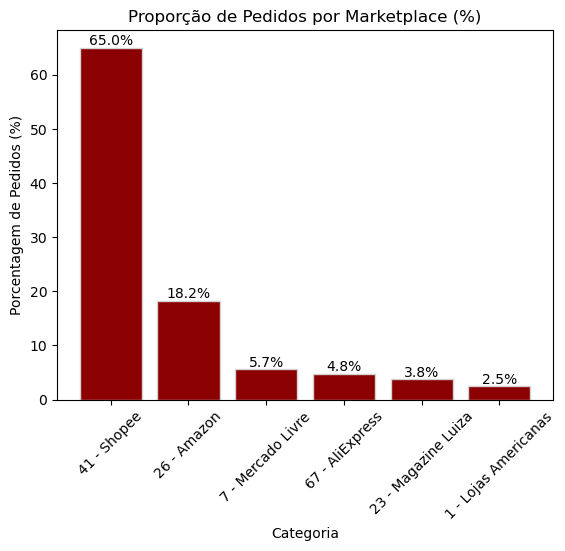

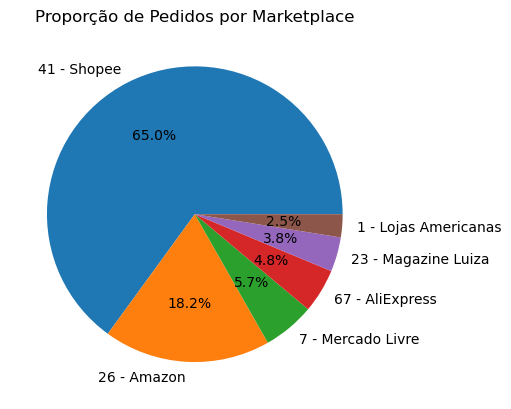

In [36]:
 #Contar os valores na coluna 'Marketplace'
counts = dataset['Marketplace'].value_counts()

# Calcular a porcentagem
percentages = (counts / counts.sum()) * 100

# Definir as cores
bar_color = '#8B0000'  # Vermelho bordo fraco
edge_color = '#D3D3D3'  # Cinza clarinho

# Criar o gráfico de barras
plt.bar(percentages.index, percentages.values, color=bar_color, edgecolor=edge_color)

# Adicionar título e rótulos
plt.title('Proporção de Pedidos por Marketplace (%)')
plt.xlabel('Categoria')
plt.ylabel('Porcentagem de Pedidos (%)')

# Exibir os valores percentuais acima das barras
for i, v in enumerate(percentages.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

# Rotacionar os rótulos do eixo x se necessário
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

dataset['Marketplace'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporção de Pedidos por Marketplace')
plt.ylabel('')
plt.show()

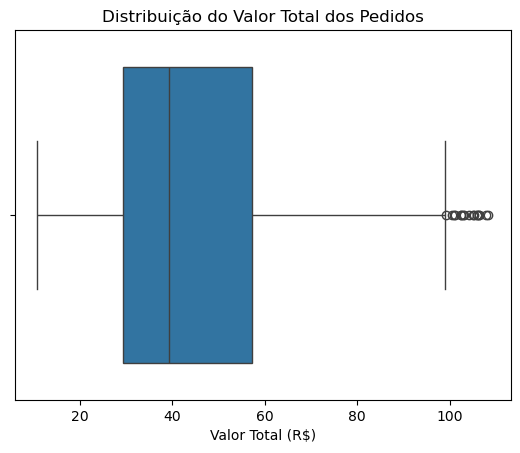

In [34]:
sns.boxplot(data=dataset, x='Valor Total')
plt.title('Distribuição do Valor Total dos Pedidos')
plt.xlabel('Valor Total (R$)')
plt.show()

/tmp/ipykernel_54326/1344305836.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataset.set_index('Data').resample('M')['Valor Total'].sum().plot(kind='line')


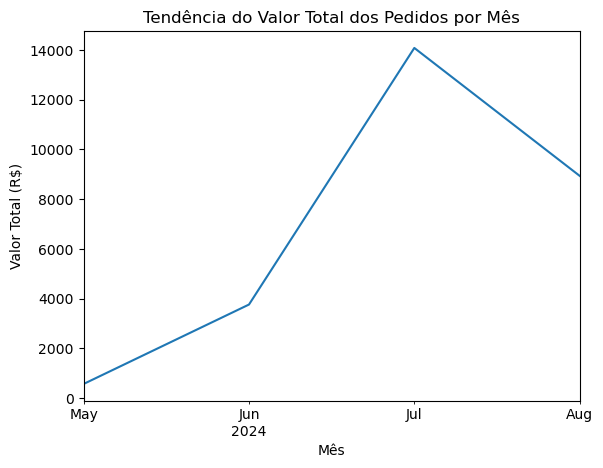

In [14]:
dataset.set_index('Data').resample('M')['Valor Total'].sum().plot(kind='line')
plt.title('Tendência do Valor Total dos Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total (R$)')
plt.show()

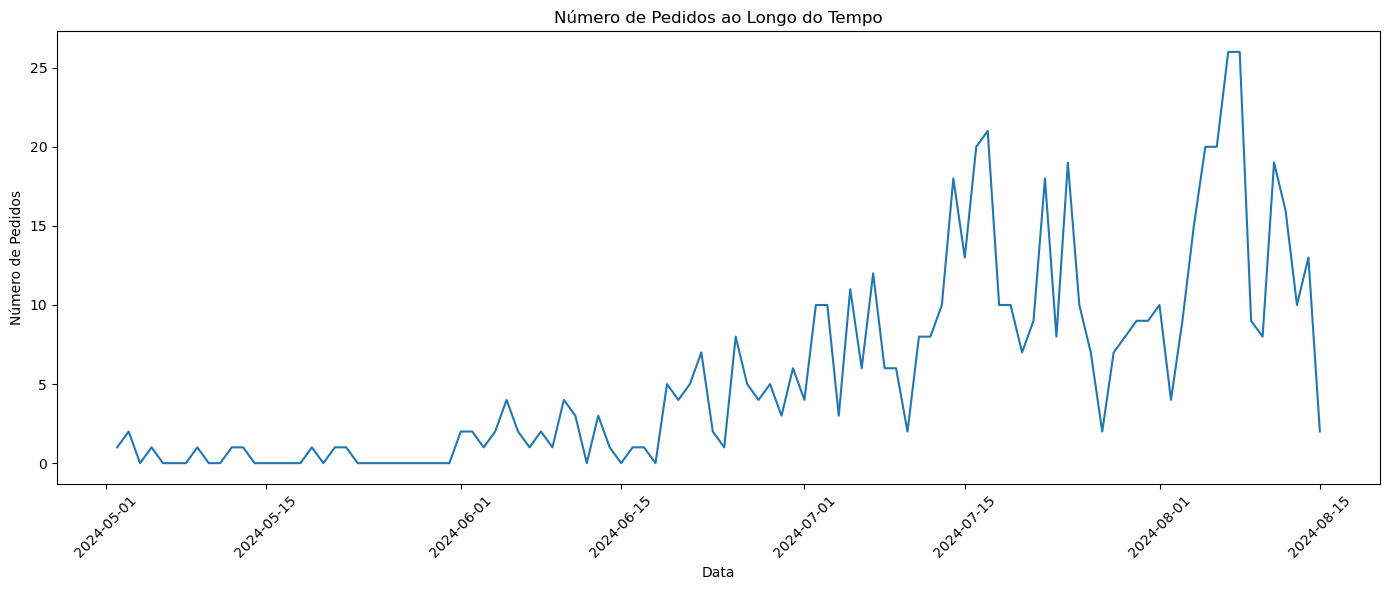

In [15]:
# Converter a coluna de data, se existir
if 'Data' in dataset.columns:
    dataset['Data'] = pd.to_datetime(dataset['Data/Hora'], format='%d/%m/%Y %H:%M')
    dataset.set_index('Data', inplace=True)
else:
    print("A coluna 'Data' não existe no dataset.")

# Resumir por dia
daily_orders = dataset.resample('D').size()

# Ajustar o tamanho da figura
plt.figure(figsize=(14, 6))  # Largura 14, Altura 6

plt.plot(daily_orders)
plt.title('Número de Pedidos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

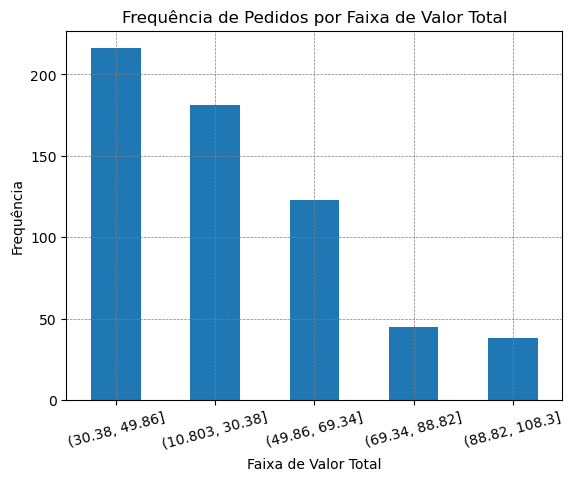

In [10]:
dataset['Faixa Valor Total'] = pd.cut(dataset['Valor Total'], bins=5)
dataset['Faixa Valor Total'].value_counts().plot(kind='bar')
plt.title('Frequência de Pedidos por Faixa de Valor Total')
plt.xlabel('Faixa de Valor Total')
plt.xticks(rotation= 15)
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

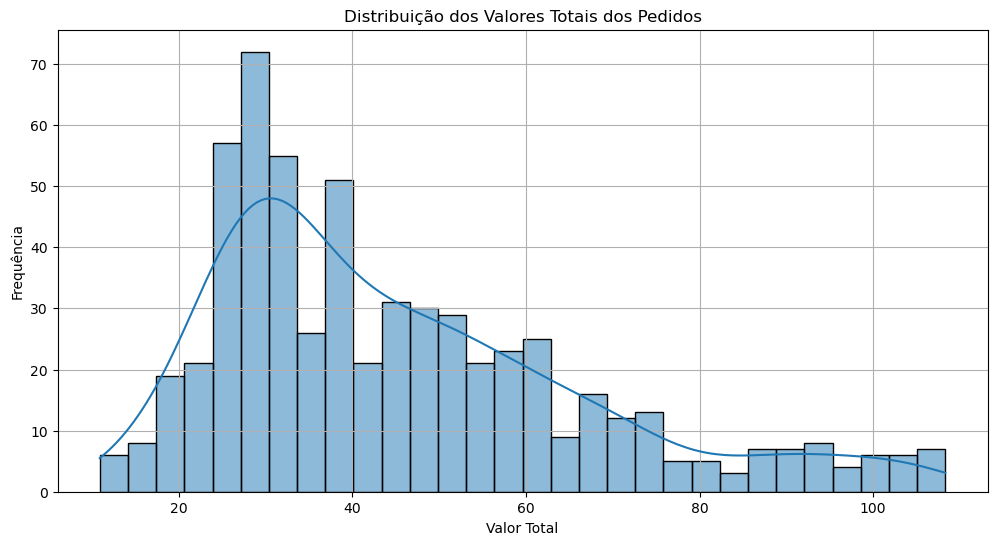

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Valor Total'], bins=30, kde=True)
plt.title('Distribuição dos Valores Totais dos Pedidos')
plt.xlabel('Valor Total')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [18]:
ticket_medio = dataset['Valor Total'].mean()

# Exibindo o resultado
print(f'Ticket Médio dos Pedidos: R$ {ticket_medio:.2f}')

Ticket Médio dos Pedidos: R$ 45.34


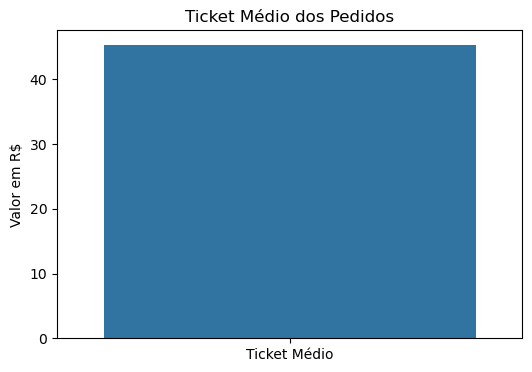

In [19]:
# Criando uma visualização do ticket médio
plt.figure(figsize=(6, 4))
sns.barplot(x=['Ticket Médio'], y=[ticket_medio])
plt.title('Ticket Médio dos Pedidos')
plt.ylabel('Valor em R$')
plt.show()

In [20]:

# Filtrando pedidos cancelados
cancelados = dataset[dataset['Situação'] == 'Cancelada']

# Exibindo as primeiras linhas dos pedidos cancelados
cancelados.head()

,Unnamed: 0,,Pedido Id,Id Entrega,Data/Hora,Data Marketplace,Data Aprovação,Id Cliente,Situação,Situação - Transporte,...,Valor Total,Valor Total Pedido,Motivo Cancelamento,Origem - Source,Origem - Referência (site),Origem - Dispositivo,Valor Pedido,Percentual Frete,Valor Total Normalizado,Faixa Valor Total
Data,,,,,,,,,,,,,,,,,,,,,
2024-08-14 08:02:00,18,pagamento-cancelado,649,648,2024-08-14 08:02:00,14/08/2024 08:01,NaN,770,Cancelada,Não Enviado,...,51.80,51.8,NaN,NaN,NaN,NaN,51.8,0.0,0.419918,"(49.86, 69.34]"
2024-08-13 20:01:00,23,pagamento-cancelado,643,643,2024-08-13 20:01:00,13/08/2024 19:51,NaN,764,Cancelada,Não Enviado,...,24.48,19.0,NaN,NaN,NaN,NaN,19.0,22.4,0.139425,"(10.803, 30.38]"
2024-08-13 07:02:00,30,pagamento-cancelado,636,636,2024-08-13 07:02:00,13/08/2024 06:51,NaN,757,Cancelada,Não Enviado,...,25.37,20.9,NaN,NaN,NaN,NaN,20.9,17.6,0.148563,"(10.803, 30.38]"
2024-08-12 19:42:00,38,pagamento-cancelado,628,628,2024-08-12 19:42:00,12/08/2024 19:30,12/08/2024 19:42,749,Cancelada,Não Enviado,...,42.08,24.9,NaN,NaN,NaN,NaN,24.9,40.8,0.320123,"(30.38, 49.86]"
2024-08-12 18:02:00,40,pagamento-cancelado,626,626,2024-08-12 18:02:00,12/08/2024 17:53,NaN,748,Cancelada,Não Enviado,...,53.24,21.9,NaN,NaN,NaN,NaN,21.9,58.9,0.434702,"(49.86, 69.34]"


In [21]:
# Contando a frequência dos motivos de cancelamento
motivos_frequencia = cancelados['Motivo Cancelamento'].value_counts()

# Exibindo os motivos
print(motivos_frequencia)

Motivo Cancelamento
Ausência de pagamento         19
Cancelado pelo Marketplace    15
Name: count, dtype: int64


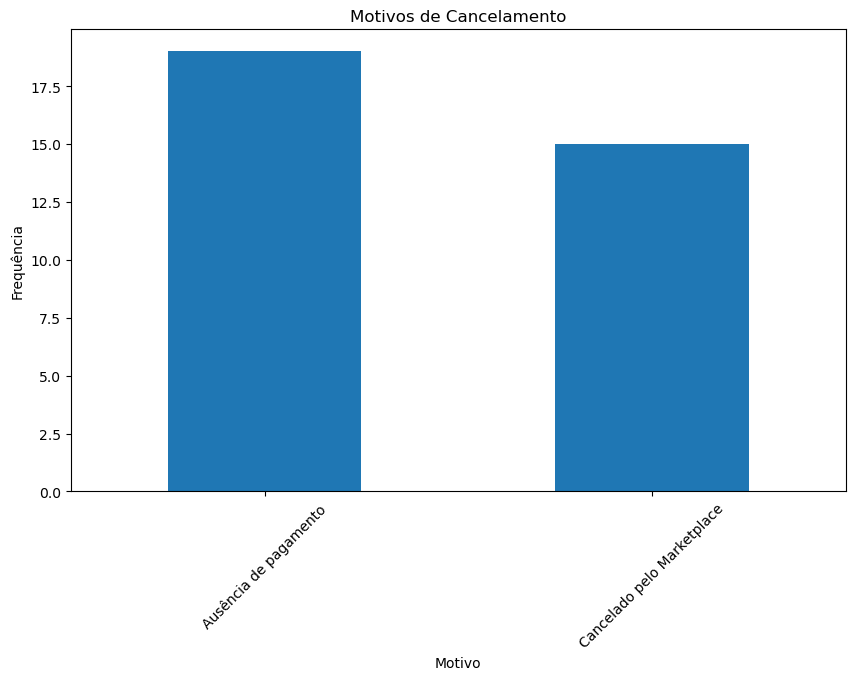

In [22]:
# Visualizando os motivos de cancelamento
plt.figure(figsize=(10, 6))
motivos_frequencia.plot(kind='bar')
plt.title('Motivos de Cancelamento')
plt.xlabel('Motivo')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

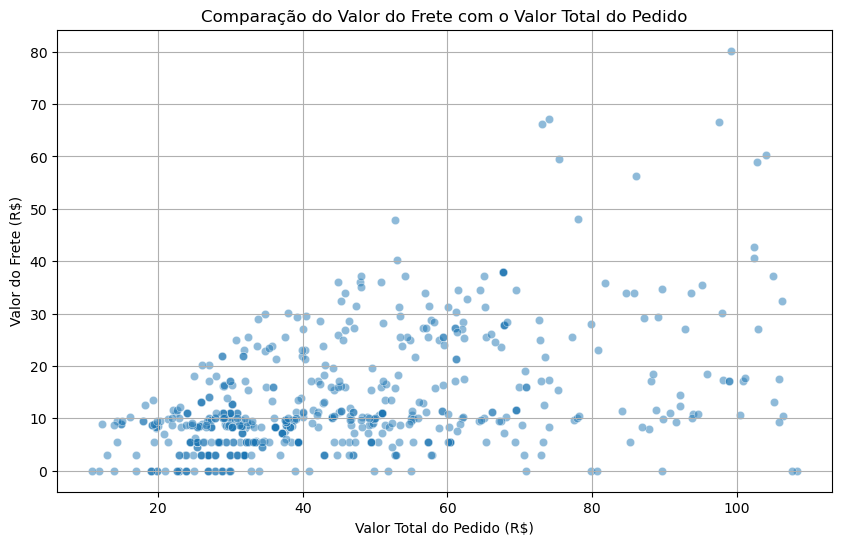

In [24]:
####### VISUALIZACAO COMPARACAO DO VALOR DO FRETE COM VALORT TOTAL DO PEDIDO
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Valor Total', y='Valor Frete', alpha=0.5)
plt.title('Comparação do Valor do Frete com o Valor Total do Pedido')
plt.xlabel('Valor Total do Pedido (R$)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()